# Klasifikasi Penderita Penyakit Liver Menggunakan Pendekatan Machine Learning

[Dataset](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records?resource=download) ini memiliki **583** data pasien dengan berbagai variabel dan kategori kelas setiap pasien. Variabel yang dimaksud di sini adalah fitur non-numerik seperti Gender, serta fitur numerik seperti Age, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin dan Albumin & Globulin Ratio. Kesepuluh fitur ini adalah fitur yang akan digunakan dalam menemukan pola pada data, sedangkan Class merupakan fitur target.

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver


Pasien yang memiliki usia lebih dari 89 tahun akan masuk dalam list usia 90 tahun. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Class                       583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [3]:
import seaborn as sns
data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('purple', as_cmap=True))

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


berdasarkan hasil dari diskripsi data tersebut, menunjukkan bahwa ;
1. rata-rata usia pasien terindikasi penyakit Liver yaitu 44 tahun, dimana pasien yang paling tertua berusia 90 tahun.
2. 441 pasien berjenis kelamin laki-laki dan 142 pasien berjenis kelamin perempuan.
3. rata-rata total kadar bilirubin dalam tubuh pasien yaitu sebesar 3,29 g/mol, dimana yang paling tertinggi yaitu 75 g/mol. Karena antara nilai kandungan bilirubin tertinggi dengan nilai rata-rata terpaut cukup jauh, maka hal tersebut mengindikasikan terdapat data outlier pada variabel Total  bilirubin.
4. Sedangkan rata-rata kadar albumin pasien yaitu sebesar 3,14 mg/dl dan yang tertinggi sebesar 5,50 mg/dl, dimana kisaran normal albumin adalah 0-8 mg/dl.


In [4]:
data.isnull().sum() #cek missing value atau data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Class                         0
dtype: int64

Ternyata terdapat data yang missing value yaitu pada data Albumin and Globulin Ratio. Memiliki 4 data yang hilang. Sehingga diperlukan suatu metode untuk mengatasi hal tersebut.

terdapat 3 cara dalam mengatasi **missing value**;
1. dibiarkan
2. Mengahapus varaibel atau baris data yang mengandung missing value==> .dropna()
3. Mensubtitusikan nilai mean/ median/ modus kedalam variabel atau baris data yang mengandung missing value==> .fillna()


variabel yang mengandung missing value yaitu albumin and globulin ratio.

 *Albumin merupakan protein utama yang memiliki struktur sederhana dengan jumlah sedikit di dalam sel, sedangkan globulin merupakan protein sederhana dengan jumlah banyak di dalam plasma dan sel*. missing value pada variabel tersebut akan diisi dengan nilai rata-rata dari kadar albumin dan globulin seluruh pasien.


In [5]:
#mengatasi missing value
rata_ag = data['Albumin_and_Globulin_Ratio'].mean()
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(rata_ag)
data['Albumin_and_Globulin_Ratio'].isna().sum()

0

In [6]:
#cek apakah ada data duplikat
print(data.duplicated().sum())
#apabila terdapat data duplicate, maka dapat diatasi dengan cara menghilangkan data tersebut
data.drop_duplicates(inplace=True)
#cek
print(data.duplicated().sum())

13
0


In [8]:
#categorical columns
cat = ['Class', 'Gender']
#continuous columns
conti =[ 'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

In [9]:
#berikut adalah sebaran nilai pada variabel kategori
for col in cat:
  print(f'''Value count kolom {col}: ''')
  print(data[col].value_counts())
  print()

Value count kolom Class: 
Liver        406
Non-Liver    164
Name: Class, dtype: int64

Value count kolom Gender: 
Male      430
Female    140
Name: Gender, dtype: int64



Text(0.5, 1.0, 'PROPORSI JENIS KELAMIN PASIEN(%)')

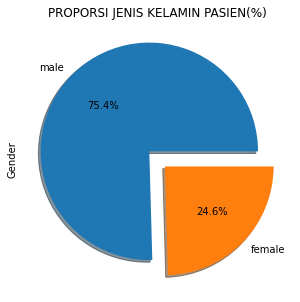

In [10]:
import matplotlib.pyplot as plt
labels = 'male','female'
data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI JENIS KELAMIN PASIEN(%)")

Text(0.5, 1.0, 'PROPORSI KATEGORI PASIEN(%)')

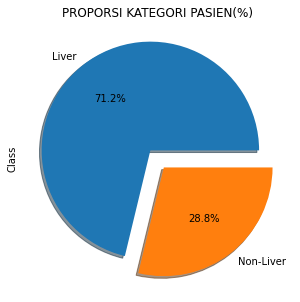

In [11]:
labels1 = 'Liver','Non-Liver'
data['Class'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels1, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI KATEGORI PASIEN(%)")

In [12]:
data = data.drop(['Age','Gender'], axis=1) #variabel Age dan Gender dihilangkan, karena tidak memiliki hubungan yang cukup signifikan terhadap penyakit liver

In [13]:
#categorical columns
cat = ['Class']
#continuous columns
conti =[ 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

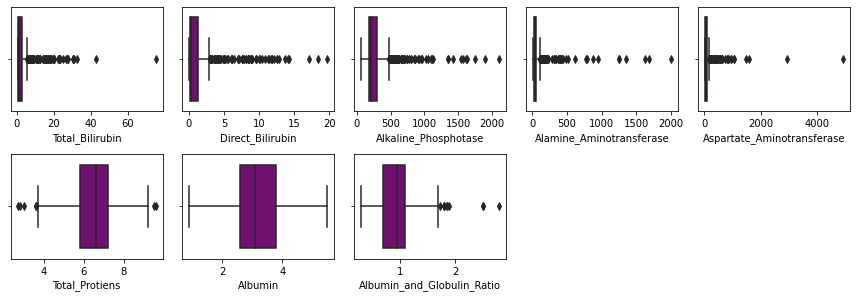

In [14]:
#cek outlier menggunakan grafik boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
for i in range(0, len(conti)):
  plt.subplot(6, 5 , i+1)
  sns.boxplot(data[conti[i]], color='purple', orient='v')
  plt.tight_layout()
# sns.boxplot(data['Asportate_Aminotransferase'], color='green', orient='v')

berdasarkan grafik boxplot tersebut menunjukkan bahwa hanya terdapat empat variabel yang tidak memiliki data yang outlier yaitu variabel age (umur), Alkaline Phosphotase, variabel kadar Albumin dan Rasio kadarAlbumin Globulin. Sedangkan untuk variabel kontinuous yang lain memiliki data outlier. Serta grafik tersebut menunjukkan bahwa data cenderung mengalami skewness positif.

In [16]:
#mengatasi outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Total_Bilirubin', 'Direct_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 570
Jumlah baris setelah memfilter outlier: 428


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

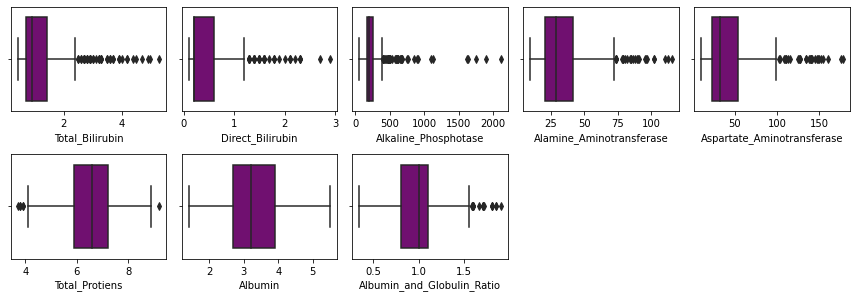

In [18]:
# cek outlier setelah diatasi
plt.figure(figsize=(12,12))
for i in range(0, len(conti)):
  plt.subplot(6, 5 , i+1)
  sns.boxplot(data1[conti[i]], color='purple', orient='v')
  plt.tight_layout()

In [19]:
#cek nilai skewness
print("Skew: {}".format(data[conti].skew())) 

Skew: Total_Bilirubin               2.113565
Direct_Bilirubin              2.061542
Alkaline_Phosphotase          5.028365
Alamine_Aminotransferase      1.520171
Aspartate_Aminotransferase    1.883239
Total_Protiens               -0.188233
Albumin                      -0.059527
Albumin_and_Globulin_Ratio    0.466303
dtype: float64


Selain itu, kita juga dapat untuk mengecek skewness berdasarkan grafik **Violin Plot**.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


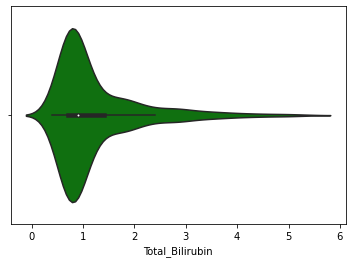

In [20]:
sns.violinplot(data['Total_Bilirubin'], color='green', orient='v')

Karena nilai skewness cenderung kecil, sehingga lebih baik tidak perlu dilakukan normalisasi. Jika terdapat data yang memiliki nilai skewness yang cukup tinggi, maka diperlukan normalisasi untuk mengatasi hal tersebut. Terdapat 3 cara untuk melakukan normalisasi, yaitu ;
1. Simple feature scaling
2. Min-Max
3. Z-score

Apabila akan melakukan normalisasi berdasarkan metode Min Max, maka dapat menggunakan syntax sebagai berikut ;


```
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
data = scaling.fit_transform(data)
data = pd.DataFrame(data)
data.head()
```

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,3,0,67,6,8,29,19,24,0
3,6,3,62,4,10,29,20,31,0
4,33,19,75,17,49,34,10,3,0
5,14,6,86,9,4,37,30,38,0
6,5,1,34,6,2,31,21,31,0


In [22]:
x = data.drop('Class', axis=1)
y = data['Class']

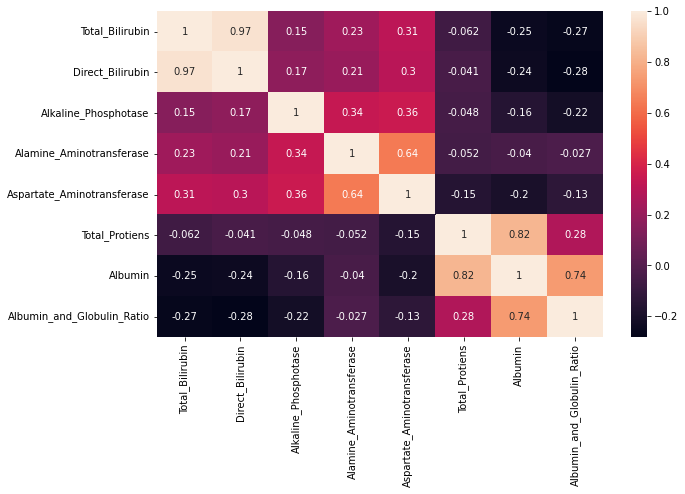

In [23]:
# cek korelasi variabel
plt.figure(figsize=(10, 6))
sns.heatmap(data1.corr(), annot=True)

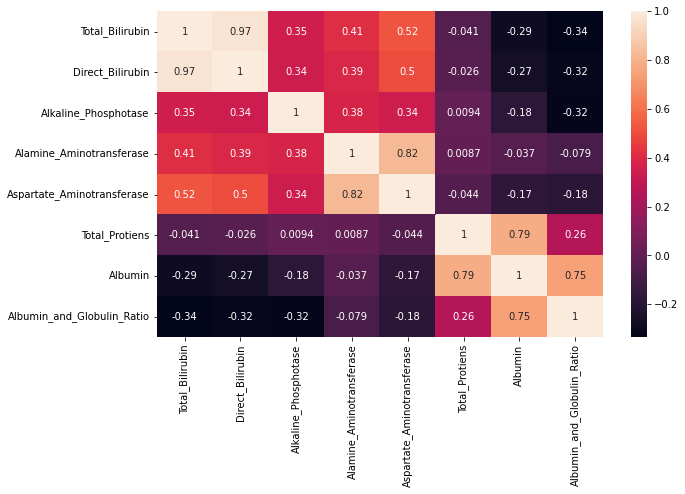

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=123)

# Model Development

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)
from sklearn import metrics
prediction_test = model.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)) 

0.6046511627906976


In [26]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(x_train,y_train)
preds = model.svm.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.6511627906976745

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
KNeighborsClassifier(n_neighbors=4)
x_train_predict=knn.predict(x_train)
x_test_predict=knn.predict(x_test)
KNeighborsClassifierScore = knn.score(x_train,y_train)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)
KNeighborsClassifierScore = knn.score(x_test,y_test)
print("Accuracy obtained by testing K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 76.36363636363637
Accuracy obtained by testing K Neighbors Classifier model: 46.51162790697674


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
DecisionTreeClassifier()
x_train_predict=dtc.predict(x_train)
x_test_predict=dtc.predict(x_test)
DecisionTreeClassifierScore = dtc.score(x_train,y_train)
print("Accuracy obtained by training Decision Tree Classifiermodel:",DecisionTreeClassifierScore*100)
DecisionTreeClassifierScore = dtc.score(x_test,y_test)
print("Accuracy obtained by testing Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by training Decision Tree Classifiermodel: 100.0
Accuracy obtained by testing Decision Tree Classifier model: 46.51162790697674


In [30]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(x_train,y_train)
preds = model.svm.predict(x_test)
SVMScore = metrics.accuracy_score(y_test, preds)
print("Accuracy obtained by training SVM model:",SVMScore*100)

Accuracy obtained by training SVM model: 65.11627906976744


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)
from sklearn import metrics
prediction_test = model.predict(x_train)
# Print the prediction accuracy
LRScore = metrics.accuracy_score(y_train, prediction_test)
print("Accuracy obtained by training Logisctic Regression model:", LRScore*100)

Accuracy obtained by training Logisctic Regression model: 64.67532467532467
